In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

In [2]:
############ DATA & TRANSFORMS

from data import get_data
from device import get_device

device = get_device(force_cpu=False)


horizontal_flip_prob = 0.2
vertical_flip_prob = 0.0
gaussian_blur_prob = 0.0
rotate_degree = 20
cutout = 0.3
#
transform_args = {}


transform_args['horizontal_flip_prob'] =  0.2
transform_args['vertical_flip_prob'] = 0.0
transform_args['gaussian_blur_prob'] = 0.0
transform_args['rotate_degree'] = 20
transform_args['cutout'] = 0.3
transform_args['cutout_height'] = 16
transform_args['cutout_width'] = 16


train_loader, test_loader = get_data(device,transform_args,batch_size=64 )

Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_loader.dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
##################### MODEL

from QuizDNNpy import NetCifar
from torchsummary import summary
model = NetCifar().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,320
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
         MaxPool2d-9           [-1, 16, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           4,640
             ReLU-11           [-1, 32, 16, 16]               0
      BatchNorm2d-12           [-1, 32, 16, 16]              64
          Dropout-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,

In [5]:
from run import run_model

epochs = 40
regularization = {'l1_factor':0,'l2_factor':0}

model,train_trackers,test_trackers,incorrect_samples = run_model(model, train_loader, test_loader, epochs, device, **regularization)


Epoch 1:
(TRAIN) batch_number:  100 Loss : 1.758 Acc : 0.27859
(TRAIN) batch_number:  200 Loss : 1.636 Acc : 0.32539
(TRAIN) batch_number:  300 Loss : 1.744 Acc : 0.35823
(TRAIN) batch_number:  400 Loss : 1.471 Acc : 0.38559
(TRAIN) batch_number:  500 Loss : 1.224 Acc : 0.40637
(TRAIN) batch_number:  600 Loss : 1.206 Acc : 0.42385
(TRAIN) batch_number:  700 Loss : 1.433 Acc : 0.43817
(TEST) Correct_classified :  5687  of 10000
(TEST) Loss : 1.194 Acc : 0.5687

 ************************************************************ 


Epoch 2:
(TRAIN) batch_number:  100 Loss : 1.198 Acc : 0.55531
(TRAIN) batch_number:  200 Loss : 1.285 Acc : 0.56211
(TRAIN) batch_number:  300 Loss : 1.303 Acc : 0.56922
(TRAIN) batch_number:  400 Loss : 1.079 Acc : 0.57551
(TRAIN) batch_number:  500 Loss : 1.024 Acc : 0.579
(TRAIN) batch_number:  600 Loss : 1.124 Acc : 0.58552
(TRAIN) batch_number:  700 Loss : 1.019 Acc : 0.59016
(TEST) Correct_classified :  6606  of 10000
(TEST) Loss : 0.9735 Acc : 0.6606

 ****

(TRAIN) batch_number:  400 Loss : 0.8247 Acc : 0.7941
(TRAIN) batch_number:  500 Loss : 0.4881 Acc : 0.79419
(TRAIN) batch_number:  600 Loss : 0.8098 Acc : 0.79609
(TRAIN) batch_number:  700 Loss : 0.5021 Acc : 0.79565
(TEST) Correct_classified :  8083  of 10000
(TEST) Loss : 0.5683 Acc : 0.8083

 ************************************************************ 


Epoch 17:
(TRAIN) batch_number:  100 Loss : 0.7724 Acc : 0.79609
(TRAIN) batch_number:  200 Loss : 0.6578 Acc : 0.79844
(TRAIN) batch_number:  300 Loss : 0.5268 Acc : 0.79646
(TRAIN) batch_number:  400 Loss : 0.5168 Acc : 0.79688
(TRAIN) batch_number:  500 Loss : 0.7177 Acc : 0.79644
(TRAIN) batch_number:  600 Loss : 0.5009 Acc : 0.7968
(TRAIN) batch_number:  700 Loss : 0.7425 Acc : 0.79734
(TEST) Correct_classified :  8114  of 10000
(TEST) Loss : 0.5612 Acc : 0.8114

 ************************************************************ 


Epoch 18:
(TRAIN) batch_number:  100 Loss : 0.6129 Acc : 0.80109
(TRAIN) batch_number:  200 Loss : 

(TRAIN) batch_number:  700 Loss : 0.5795 Acc : 0.79725
(TEST) Correct_classified :  8102  of 10000
(TEST) Loss : 0.5593 Acc : 0.8102

 ************************************************************ 


Epoch 32:
(TRAIN) batch_number:  100 Loss : 0.4981 Acc : 0.80359
(TRAIN) batch_number:  200 Loss : 0.6608 Acc : 0.79937
(TRAIN) batch_number:  300 Loss : 0.7146 Acc : 0.79578
(TRAIN) batch_number:  400 Loss : 0.5811 Acc : 0.79551
(TRAIN) batch_number:  500 Loss : 0.655 Acc : 0.79534
(TRAIN) batch_number:  600 Loss : 0.8092 Acc : 0.79529
(TRAIN) batch_number:  700 Loss : 0.56 Acc : 0.79614
(TEST) Correct_classified :  8116  of 10000
(TEST) Loss : 0.5577 Acc : 0.8116

 ************************************************************ 


Epoch 33:
(TRAIN) batch_number:  100 Loss : 0.5517 Acc : 0.79984
(TRAIN) batch_number:  200 Loss : 0.5443 Acc : 0.79609
(TRAIN) batch_number:  300 Loss : 0.5607 Acc : 0.79943
(TRAIN) batch_number:  400 Loss : 0.701 Acc : 0.80023
(TRAIN) batch_number:  500 Loss : 0.

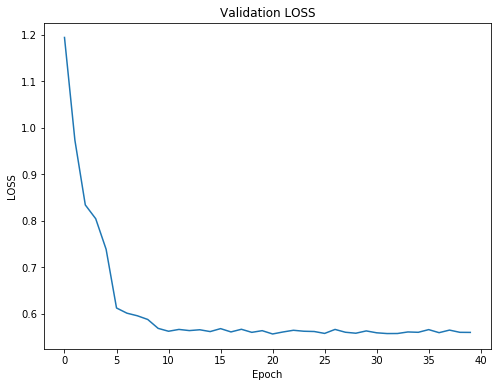

In [6]:
import matplotlib.pyplot as plt

metric = 'LOSS'
# Initialize a figure
fig = plt.figure(figsize=(8, 6))

# Plot values
plain_plt, = plt.plot(test_trackers['test_losses'])


# Set plot title
plt.title(f'Validation {metric}')

# Label axes
plt.xlabel('Epoch')
plt.ylabel(metric)

# Set legend
location = 'upper' if metric == 'Loss' else 'lower'


In [7]:
torch.save(model.state_dict() , 'C://Users//saina//Documents//EVA//S9//trained_quiz.pt') 